In [74]:
#imports
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [65]:
#read in data
df = pd.read_csv('Resources/crypto_data.csv')

In [66]:
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [67]:
#filter out non-traded coins
traders_only = df.query('IsTrading == True')

In [68]:
traders_only

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [69]:
#drop NaN rows and frivolous columns

traders_only_dropped_values = traders_only.drop('IsTrading', axis=1)
traders_only_dropped_values = traders_only_dropped_values.dropna()
traders_only_dropped_values = traders_only_dropped_values[traders_only_dropped_values['TotalCoinsMined']>0]
traders_only_dropped_values =traders_only_dropped_values.drop(['CoinName', 'Unnamed: 0'], axis=1)
traders_only_dropped_values

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [70]:
#converting categorical columns Algorithm and ProofType to numerical so the ML algorithms can process them
processed_df = pd.get_dummies(traders_only_dropped_values,prefix=['Algorithm', 'ProofType'], columns=['Algorithm' ,'ProofType'])
processed_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#Scale, PCA, and TSNE data inside of a pipeline. Mostly just seeing if I can do this in a pipeline
#steps = [
 #   ('scaler', StandardScaler()),
  #  ('pca', PCA(n_components=0.99)),
   # ('tsne', TSNE(learning_rate=250))
#]
#pipe = Pipeline(steps)
#piped_df=pipe.fit(processed_df)
#piped_df

In [80]:
#Scale, PCA, and TSNE data, since I couldnt get the damn pipeline to work. 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(processed_df)
pca = PCA(n_components=0.99)
pca_features=pca.fit_transform(scaled_features)
tsne=TSNE(learning_rate=250)
tsne_features=tsne.fit_transform(pca_features)
tsne_features.shape

(532, 2)

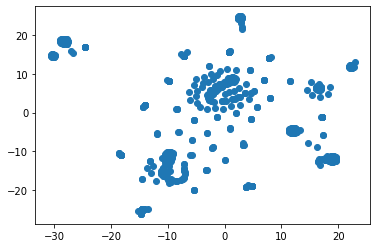

In [81]:
X = tsne_features[:,0]
y = tsne_features[:,1]
#chart the data for some good ole visualization
plt.scatter(X,y)
plt.show()
#This scatterplot looks like some post-modern art. Some clear clustering of the data, even if it looks real goofy

In [82]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


C:\Users\1800h\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,180947.265625
1,2,113316.093750
2,3,65660.929688
3,4,36229.015625
4,5,28136.007812


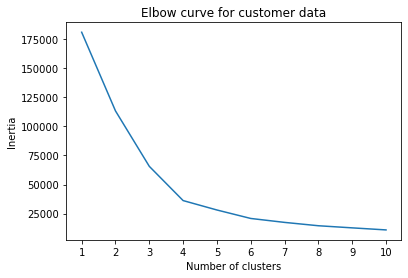

In [83]:
#Plot the elbow curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()
#Elbow curve points to 4 clusters being the optimum fitting 